<a href="https://colab.research.google.com/github/RafaelCaballero/Julio24/blob/main/code/proyecto8_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la ciencia de datos con Python
Rafa Caballero


## K-means (clustering the filas) - Proyecto

Buscar el k adecuado para el siguiente fichero. Intertar hacerlo primero normal y luego con un pipeline que incluya standard scaler

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/PisaDataClean.csv"
import pandas as pd

df = pd.read_csv(path)

df

,RPC,PAIS,MAT,MAT_FE,MAT_MA,REA,REA_FE,REA_MA,SCI,SCI_FE,SCI_MA
0,13274,Albania,413.1570,417.750029,408.545459,405.2588,434.639626,375.759199,427.2250,439.442963,414.957644
1,15757,Algeria,359.6062,363.072479,356.495106,349.8593,366.208167,335.185436,375.7451,383.220939,369.035234
2,21528,Argentina,409.0333,400.443116,418.388361,425.3031,432.958080,416.966607,432.2262,424.994351,440.102030
3,52190,Australia,493.8962,490.985501,496.761345,502.9006,518.865799,487.185525,509.9939,508.921647,511.049257
4,51936,Austria,496.7423,483.133026,510.098216,484.8656,495.075191,474.846032,495.0375,485.526754,504.371197
...,...,...,...,...,...,...,...,...,...,...,...
58,40289,Spain,485.8432,477.859261,493.848504,495.5764,505.684720,485.441145,492.7861,489.456046,496.125124
59,53077,Sweden,493.9181,495.052562,492.804135,500.1556,519.949815,480.718278,493.4224,495.718307,491.167800
60,28346,Turkey,420.4540,417.527011,423.377693,428.3351,442.246081,414.439584,425.4895,428.654774,422.327767
61,68662,United Arab Emirates,427.4827,430.702033,424.173383,433.5423,458.287029,408.105325,436.7311,449.338558,423.771046


### En busca de la K

¿Cuál es el número óptimo de grupos? Utilizar un pipeline con StandardScaler



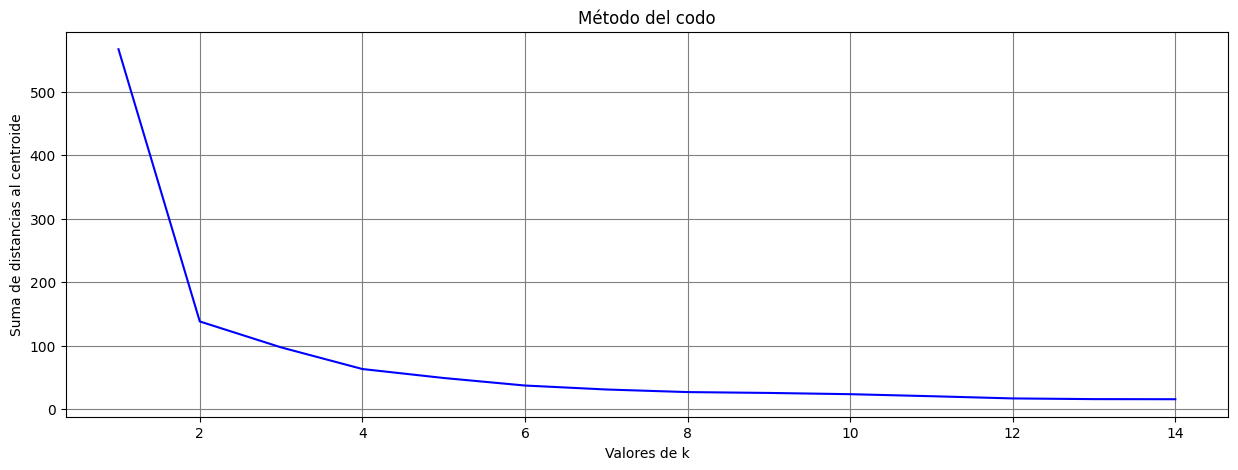

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

XColumns = [c for c in df.columns if c!="PAIS" and c!="RPC"]
X = df[XColumns]
suma_de_cuadrados = []
K = range(1,15)
for k in K:
    steps = [('scaler', StandardScaler()),  ('Kmeans', KMeans(n_clusters=k,n_init='auto'))]
    metodo = Pipeline(steps)
    metodo.fit(X)
    suma_de_cuadrados.append(metodo.steps[1][1].inertia_)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(K, suma_de_cuadrados,color="blue")
ax.set_xlabel('Valores de k')
ax.set_ylabel('Suma de distancias al centroide')
ax.grid(b=True, which='major', color='gray', linestyle='-')
plt.title('Método del codo')
plt.show()

Aplicar k means con el k indicado. Crear un dataframe df2 con una columna adicional "C" que contenga el clúster

In [ ]:
k=2
model = KMeans(init='k-means++', n_clusters=k, n_init='auto')
model.fit(X)

df2 = df.copy()
df2["C"] = model.labels_

df2[:40]

,RPC,PAIS,MAT,MAT_FE,MAT_MA,REA,REA_FE,REA_MA,SCI,SCI_FE,SCI_MA,C
0,13274,Albania,413.1570,417.750029,408.545459,405.2588,434.639626,375.759199,427.2250,439.442963,414.957644,1
1,15757,Algeria,359.6062,363.072479,356.495106,349.8593,366.208167,335.185436,375.7451,383.220939,369.035234,1
2,21528,Argentina,409.0333,400.443116,418.388361,425.3031,432.958080,416.966607,432.2262,424.994351,440.102030,1
3,52190,Australia,493.8962,490.985501,496.761345,502.9006,518.865799,487.185525,509.9939,508.921647,511.049257,0
4,51936,Austria,496.7423,483.133026,510.098216,484.8656,495.075191,474.846032,495.0375,485.526754,504.371197,0
5,48258,Belgium,506.9844,499.739022,514.002572,498.5242,506.638599,490.664156,501.9997,496.031867,507.780477,0
6,16199,Brazil,377.0695,369.549307,385.040591,407.3486,418.561682,395.463255,400.6821,398.699999,402.783037,1
7,17669,Costa Rica,400.2534,392.312861,408.451612,427.4875,434.874832,419.860486,419.6080,410.834860,428.665961,1
8,38980,Cyprus,437.1443,439.534071,434.706449,442.8443,468.658337,416.827052,432.5964,440.948187,424.147822,1
9,51643,Denmark,511.0876,506.374751,515.756469,499.8146,510.951614,488.781640,501.9369,498.902705,504.942715,0


**Ejercicio** Calcular la nota media en MAT en cada clúster

In [ ]:
for c in range(k):
    print(c,df2[df2.C==c].MAT.sum())

0 18355.7179
1 10553.6346


**Ejercicio** Calcular la nota media en RPC en cada clúster

In [ ]:
for c in range(k):
    print(c,df2[df2.C==c].RPC.sum())

0 1735873
1 672711


**Ejercicio** Mostrar los centros

In [ ]:
model.cluster_centers_

array([[496.10048378, 492.5158786 , 499.63831798, 495.51432973,
        509.48633284, 481.79644   , 498.39261622, 496.87694713,
        499.90695538],
       [405.90902308, 405.64936502, 406.28615607, 413.73574615,
        430.43218633, 396.90144397, 417.29772308, 420.02474438,
        414.67785216]])

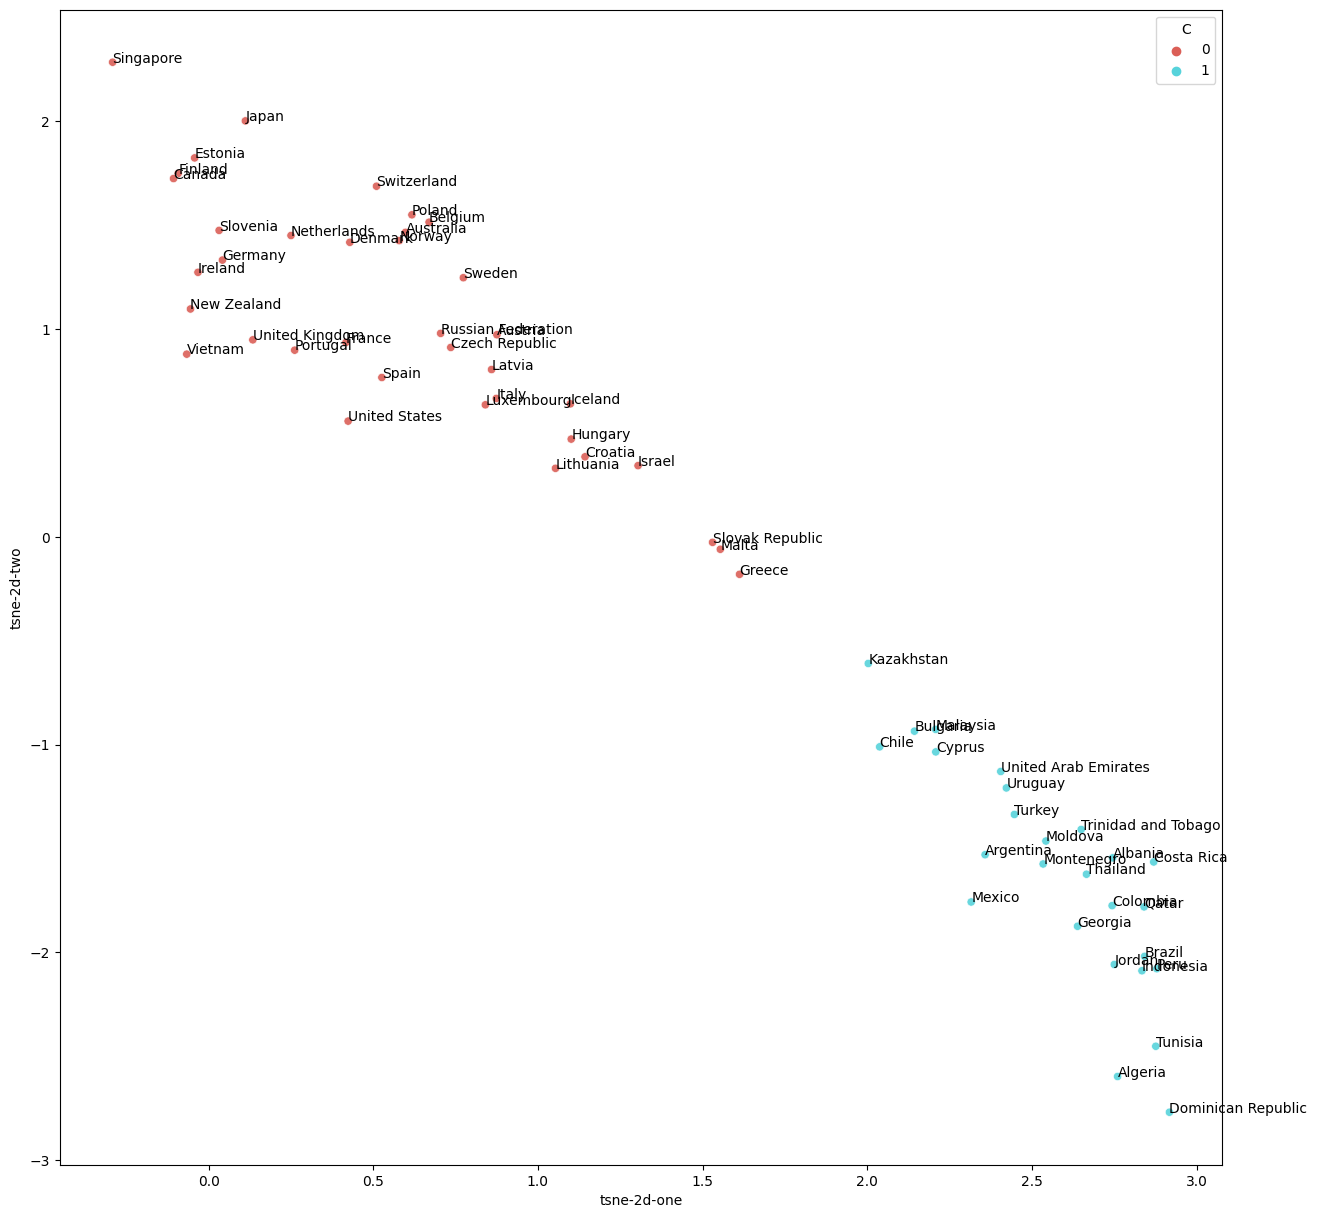

In [ ]:
import seaborn as sns
from sklearn.manifold  import TSNE
def tsne(df):
    df_subset = df.copy()
    data_subset = X.values
    tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(data_subset)
    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]
    fig, ax = plt.subplots(figsize=(15, 15))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue = "C",
        palette=sns.color_palette("hls", 2),
        sizes=(400, 4000), alpha=.9,
        data=df_subset,
        legend="full",
        ax=ax
    )
    for i in range(len(df)):
        ax.text(df_subset['tsne-2d-one'].values[i],df_subset['tsne-2d-two'].values[i], df_subset["PAIS"].values[i])
    plt.show()

tsne(df2)